## Problem Pięciu Filozofów

### Krótki opis rozwiązania

Zasadnicze rozwiązanie - Java 17<br>
Wizualizacja i analiza danych - Python 3.9.12
<br>

Zadanie 1 powodowało zakleszczenie, więc nie jest one przedmiotem analizy

Sposób rozwiązania:<br>
- Widelce
    - "Sytuację" widelców zasymulowałem tworząc tablicę bibliotecznych semaforów(java.util.concurrent.Semaphore) o nazwie fork. Widelec może być tylko zajęty albo wolny - więc naturalnym dla mnie było zastosowanie tutaj semaforów.<br>
- Filozofowie
    - Do implementacji zachowań filozofów stworzyłem klasę własnej implementacji (Philosopher lub DiningPhilosopher). Wszyscy filozofowie implemetują intefejs Runnable, a każdy kolejny dziedziczy po zad1.Philosopher, wyjątkiem jest tutaj zad6_.DiningPhilosopher, który dziedziczy po zad5_.DiningPhilosopher.

Główną klasą są odpowiednio: Main dla podpunktów 1-4 oraz Main_ dla podpunktów 5-6. 
W obu klasach wystarczy zmienić import klasy odpowiednio Philosopher(1-4) lub DiningPhilosopher(5-6) - i opcjonalnie zmienić nazwę pliku wyjściowego, żeby uruchomić program. 

Domyślnie nie są printowane zachowania filozofów, żeby je jednak zobaczyć, należy użyć konstruktora, który na końcu przyjmuje dodatkowo wartość logiczną - po wprowadzeniu true - wątki będą wypisywać to, co robią filozofowie.

Poniżej zaprezentowane są wyniki dla 20, 30 i 50 filozofów oraz 2s, 5s i 10s wykonywania programów. Na osi poziomej przedstawiłem numer zadania, a na osi pionowej średni czas oczekiwania wyliczony ze średnich czasów oczekiwania filozofów.

### Operacowanie wyników

Funkcje pomocnicze

In [6]:
import matplotlib.pyplot as plt

def show_results(number_of_philosophers):
    zad_numbers = range(2, 7)  # Change the range to 2-6 for 5 boxplots
    file_contents = []
    
    for i in zad_numbers:
        with open(f"outputs/{number_of_philosophers}_zad{i}.txt", "r") as f:
            data = [float(line.strip()) for line in f]
            file_contents.append(data)

    plt.boxplot(file_contents, zad_numbers)
    plt.xlabel('Numer zadania')
    plt.ylabel('Czas (ns)')
    plt.title(f"Rozkłady czasu dla {number_of_philosophers.split('_')[0]} filozofów\ndla {number_of_philosophers.split('_')[1]}s trwania programu")
    plt.show()


## Zestawienia wyników

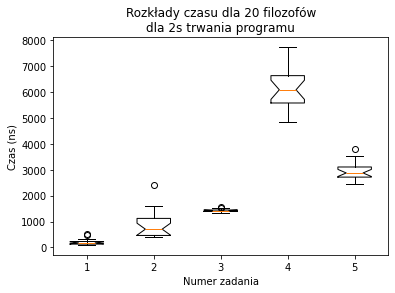

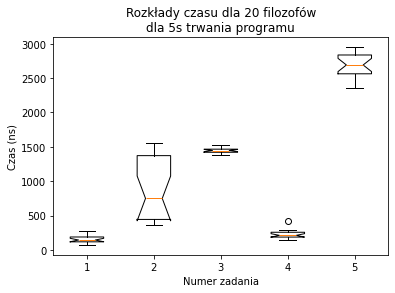

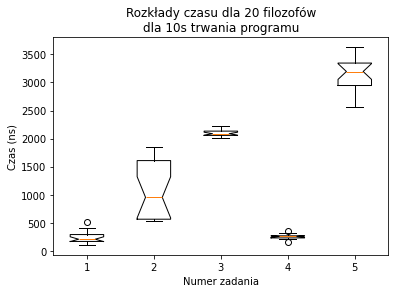

In [7]:
show_results("20_2")
show_results("20_5")
show_results("20_10")

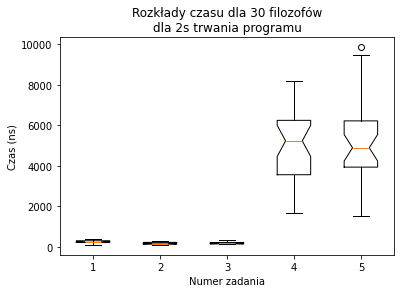

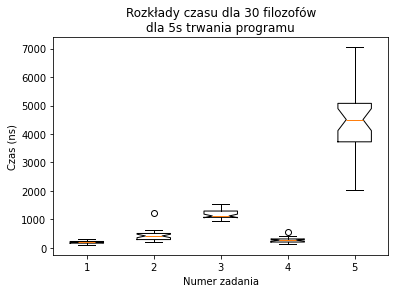

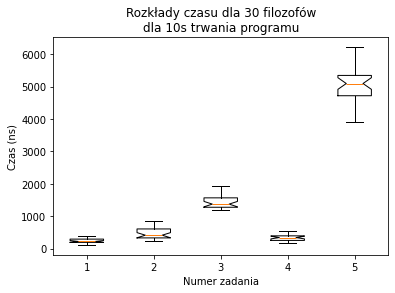

In [8]:
show_results("30_2")
show_results("30_5")
show_results("30_10")

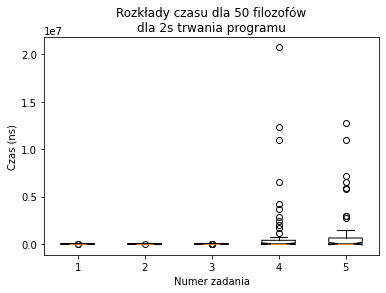

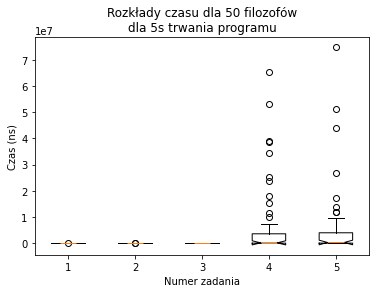

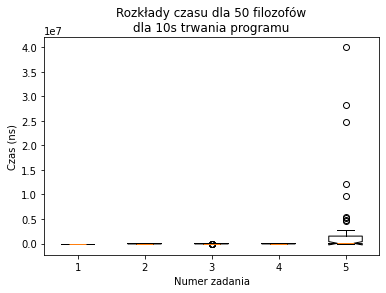

In [9]:
show_results("50_2")
show_results("50_5")
show_results("50_10")

### Wnioski

- Duży czasowy narzut dla 5 i 6 podpunktu jest prawdopodobnie konsekwencją użycia synchronized w klasie DiningRoom.
- Możliwe też, że obliczenia zostały wydłużone przez samo zastosowanie dodatkowej klasy. 
- Zauważalne jest, że przy dłuższym czasie działania różnica między czasem obliczeń punktów 1-4 i 5-6 ulega zmniejszeniu, prawdopodobnie przez zmniejszenie istotności wartości odstających. Nadal jednak różnica pozostaje znacząca